In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from math import radians, sin, cos, asin, sqrt
import seaborn as sns
from haversine import haversine


Correspondance code INSEE (postal) - coordonnées géographiques

In [2]:
#communes = pd.read_csv("./communes-france-2022.csv")
communes = pd.read_csv("./FinalData.csv",sep=";")


/var/folders/j6/rmtqpjm53hg_prjc1kd43mmm0000gn/T/ipykernel_1326/2142543448.py:2: DtypeWarning: Columns (0,12,14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  communes = pd.read_csv("./FinalData.csv",sep=";")


In [5]:

population = communes["population"].values
vote_gauche = communes["voteG"].values
chomage = communes["chom"].values
revenu_moyen = communes["revmoy"].values
diplome = communes["sup"].values
taux_immigre= communes["imm"].values
age_moyen = communes["age"].values
latitudes = communes["latitude_mairie"].values
longitudes = communes["longitude_mairie"].values

I/ PRELIMINAIRES \\

1. Tests generaux sur les données
Notamment : Des plots et des corrélations entre différentes variables.
A. plot population / vote à gauche
B. plot age/vote à gauche
C. plot revenue/vote à gauche
\\

2. Quelle partie des données retenir ?
Graphe trop grand:  quelques idées pour choisir quelles données:
- communes avec plus de X habitants
- fusionner les plus petites communes entre elles (comment fusionner? sommer les populations? moyenne des autres variables?)
- choisir une région spécifique : (+) garder la différence entre zones rurales et urbaines

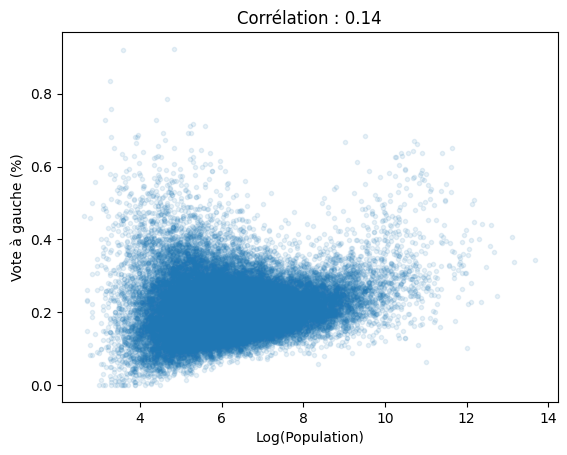

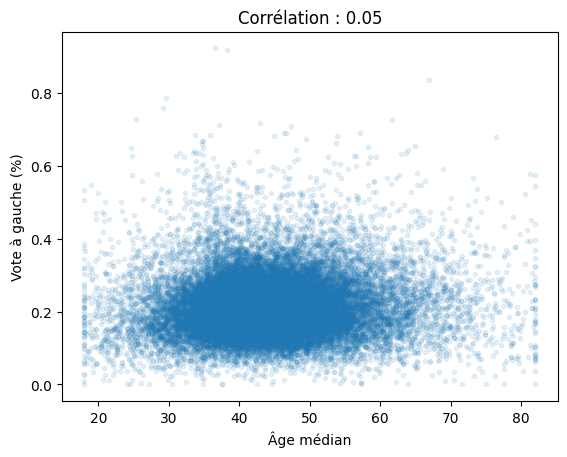

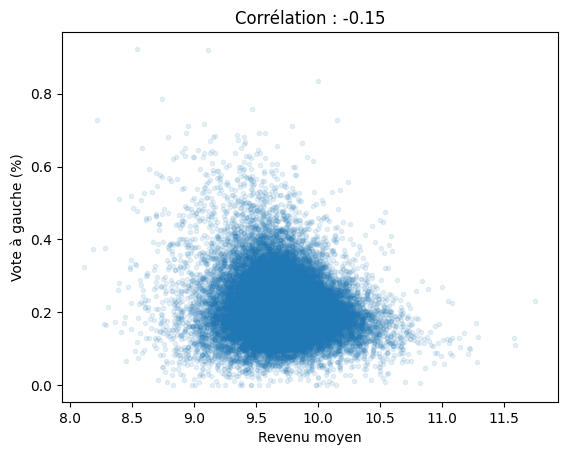

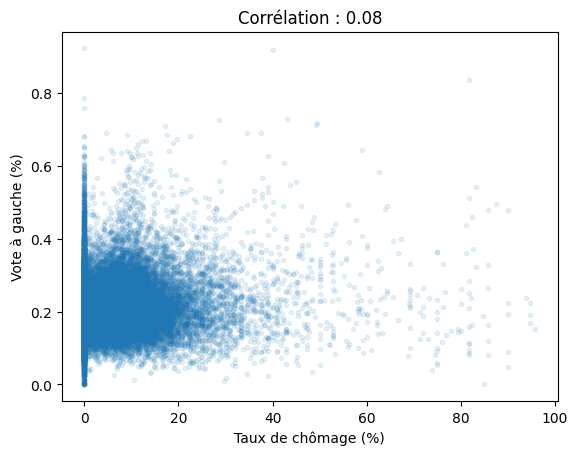

Text(0.5, 1.0, 'Corrélation : 0.10')

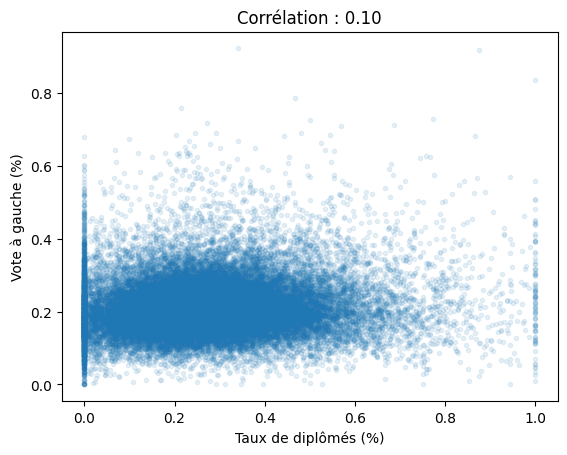

In [56]:
# population vs vote gauche
plt.scatter(np.log(population), vote_gauche,marker='.', alpha=0.1)
plt.xlabel("Log(Population)")
plt.ylabel("Vote à gauche (%)")
#Calcul coefficient de corrélation
correlation1 = np.corrcoef(population, vote_gauche)[0, 1]
plt.title(f"Corrélation : {correlation1:.2f}")
plt.show()
# âge moyen vs vote gauche
plt.scatter(age_moyen, vote_gauche,marker='.', alpha=0.1)
#correlation
correlation = np.corrcoef(age_moyen, vote_gauche)[0, 1]
plt.xlabel("Âge médian")
plt.ylabel("Vote à gauche (%)")
plt.title(f"Corrélation : {correlation:.2f}")
plt.show()

# revenu moyen vs vote gauche
plt.scatter(np.log(revenu_moyen), vote_gauche,marker='.', alpha=0.1)
#correlation
correlation2 = np.corrcoef(revenu_moyen, vote_gauche)[0, 1]
plt.xlabel("Revenu moyen")
plt.ylabel("Vote à gauche (%)")
plt.title(f"Corrélation : {correlation2:.2f}")
plt.show()

# taux de chômage vs vote gauche
# enler les valeurs aberrantes de chomage > 100%
communes_filtered_chomage = communes[communes["chom"] < 1]
chomage_filtre = communes_filtered_chomage["chom"].values * 100
vote_gauche_chomage = communes_filtered_chomage["voteG"].values
plt.scatter(chomage_filtre, vote_gauche_chomage,marker='.', alpha=0.1)
#correlation
correlation3 = np.corrcoef(chomage, vote_gauche)[0, 1]
plt.xlabel("Taux de chômage (%)")
plt.ylabel("Vote à gauche (%)")
plt.title(f"Corrélation : {correlation3:.2f}")
plt.show()

# taux de diplômés vs vote gauche
plt.scatter(diplome, vote_gauche,marker='.', alpha=0.1)
#correlation
correlation4 = np.corrcoef(diplome, vote_gauche)[0, 1]
plt.xlabel("Taux de diplômés (%)")
plt.ylabel("Vote à gauche (%)")
plt.title(f"Corrélation : {correlation4:.2f}")

# trouver quelle ville a un chomage de plus de 100%!

In [77]:
for i, txt in enumerate(communes["nom_standard"]):
    if chomage[i] > 1:
        print(communes["nom_standard"][i], chomage[i],population[i])


Issanlas 1.125 99
Bagert 1.8 37
Orus 1.059 26
Unac 1.286 125
Montjoi 4.5 36
Bessé 2.125 110
Montmaur-en-Diois 1.308 85
Saint-Victor-sur-Avre 1.5 56
Bonneuil 4.5 74
Theneuil 1.8 293
Champrougier 1.143 102
Lavoûte-Chilhac 1.462 272
Coublanc 1.75 118
Couptrain 1.7 133
Raon-lès-Leau 1.429 37
Domremy-la-Canne 1.5 35
Saint-Joire 1.111 239
Liéhon 1.263 123
Jailly 2.667 68
Couturelle 4.5 71
Medeyrolles 1.125 122
Taron-Sadirac-Viellenave 4.5 192
Urdos 1.286 66
Vy-lès-Rupt 1.375 81
Puéchoursi 4.5 101
Vaour 1.179 303
Hardancourt 1.125 40


Je suis un assistant de programmation AI. Pour explorer l'hétérogénéité des données des villes de plus de X habitants dans un contexte socio-économique, vous pourriez envisager d'utiliser des techniques statistiques et de visualisation. Voici quelques étapes que vous pourriez suivre :

1. **Filtrer les données** : Sélectionnez les villes ayant une population supérieure à X.

2. **Calculer des statistiques descriptives** : Pour chaque indicateur socio-économique, calculez des statistiques comme la moyenne, la médiane, l'écart-type, etc.

3. **Visualiser les données** : Utilisez des graphiques (boxplots, histogrammes, etc.) pour visualiser la distribution des indicateurs socio-économiques.

4. **Analyser la corrélation** : Examinez les corrélations entre différents indicateurs pour voir s'il existe des relations significatives.

5. **Effectuer des tests statistiques** : Utilisez des tests comme ANOVA ou des tests de variance pour évaluer l'hétérogénéité entre les groupes.

6. **Interpréter les résultats** : Discutez des implications des résultats et de ce qu'ils signifient pour l'hétérogénéité des indicateurs socio-économiques.

Si vous avez besoin d'aide pour écrire du code pour l'une de ces étapes, n'hésitez pas à demander !


1461


Text(0.5, 1.0, 'Corrélation (pop > 1000) : 0.23')

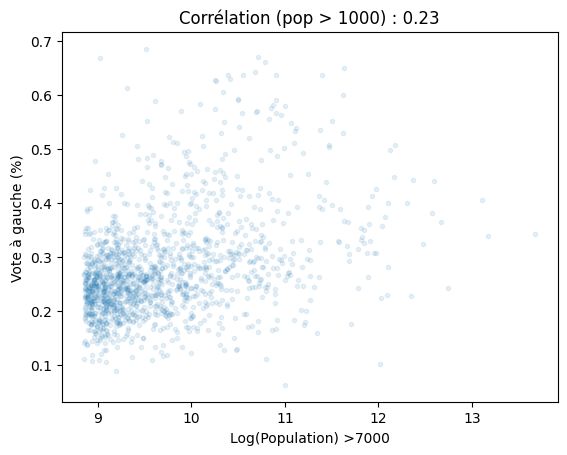

In [9]:
# Filtrage de données pour les communes avec population > seuil:
seuil = 7000
communes_filtered = communes[communes["population"] > seuil]
population_filtered = communes_filtered["population"].values
vote_gauche_filtered = communes_filtered["voteG"].values
plt.scatter(np.log(population_filtered), vote_gauche_filtered,marker='.', alpha=0.1)
plt.xlabel("Log(Population) >"+str(seuil))
print(len(communes_filtered))
# Calcul coefficient de corrélation
correlation_filtered = np.corrcoef(population_filtered, vote_gauche_filtered)[0, 1]
plt.ylabel("Vote à gauche (%)")
plt.title(f"Corrélation (pop > 1000) : {correlation_filtered:.2f}")


Text(0.5, 1.0, 'Corrélation (pop > 1000) : -0.14')

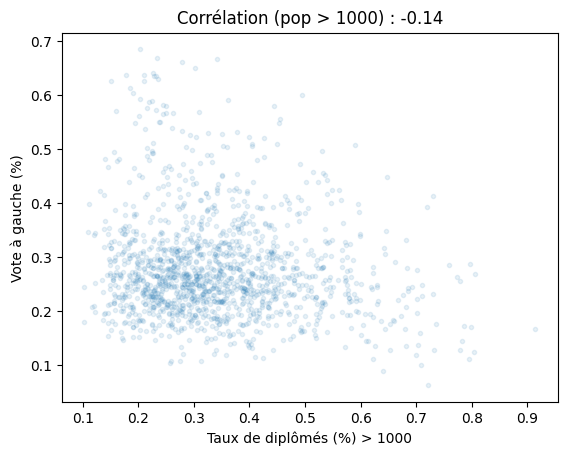

In [10]:
# autres indicateurs filtrés: 
revenu_moyen_filtered = communes_filtered["revmoy"].values
population_filtered = communes_filtered["population"].values
chomage_filtered = communes_filtered["chom"].values
diplome_filtered = communes_filtered["sup"].values
taux_immigre_filtered= communes_filtered["imm"].values
latitudes_filtered = communes_filtered["latitude_mairie"].values
longitudes_filtered = communes_filtered["longitude_mairie"].values
# diplomé vs vote gauche
plt.scatter(diplome_filtered, vote_gauche_filtered,marker='.', alpha=0.1)
#correlation
correlation_diplome_filtered = np.corrcoef(diplome_filtered, vote_gauche_filtered)[0, 1]
plt.xlabel("Taux de diplômés (%) > 1000")  
plt.ylabel("Vote à gauche (%)")
plt.title(f"Corrélation (pop > 1000) : {correlation_diplome_filtered:.2f}")

II/ Graphe spatial : peut-il représenter les données?

In [127]:
insee = communes['code_insee']
# Extraction des vecteurs
lat = communes["latitude_mairie"].values
lon = communes["longitude_mairie"].values

# en radian
lat_r , long_r = lat*2*np.pi/360 , long*2*np.pi/360

#N = len(insee)
# on prends les 393 premières communes (AIN)
N = 1000
insee_s , lat_s, long_s = insee[:N], lat[:N], long[:N]


Distance entre communes

In [70]:

def haversine_vec(lat1, lon1, lat2, lon2, R=6371000.0):
    # lat/ lon already in radians; inputs can be arrays broadcastable
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c


Partie inutile pour la création de la matrice de distance


In [ ]:

# ---- charge coordonnées ----
comm = pd.read_csv("villes.csv")  # colonnes: ville, lat, lon
# Extraction des vecteurs
lat = no.radian(comm["latitude_mairie"].values)
lon = np.radian(comm["longitude_mairie"].values)

n = len(lat)

# ---- memmap pour la matrice résultat (float32) ----
out_fname = "distances_30k.dat"
dist_mm = np.memmap(out_fname, dtype="float32", mode="w+", shape=(n, n))

# ---- paramètres de bloc ----
block = 1000  # ajuster selon RAM (500..2000)
for i in range(0, n, block):
    i2 = min(n, i + block)
    lat_i = lat[i:i2][:, None]   # shape (bi,1)
    lon_i = lon[i:i2][:, None]
    # broadcast avec tout le vecteur colonne (1, n)
    lat_all = lat[None, :]       # shape (1,n)
    lon_all = lon[None, :]
    # calcule bloc (bi, n)
    d_block = haversine_vec(lat_i, lon_i, lat_all, lon_all)
    dist_mm[i:i2, :] = d_block.astype("float32")
    # si tu veux ne remplir que la triangle supérieure, tu peux appliquer un masque
    print(f"computed rows {i}..{i2-1}")

# sync disque
dist_mm.flush()

In [15]:

# Création des grilles (broadcasting)
lat1, lat2 = np.meshgrid(lat, lat)
lon1, lon2 = np.meshgrid(lon, lon)

# Matrice des distances (en mètres)
distance_matrix = haversine(lat1, lon1, lat2, lon2)

KeyboardInterrupt: 

Matrice de distance entre communes dij= distance entre communes i et j

In [25]:
for i in range(N)

D = np.array([[haversine(lat_s[i],long_s[i],lat_s[j],long_s[j]) for j in range(N)] for i in range(N)])*1e-3 #en km

Création d'un graphe à partir de la distance , deterrence function = soft RGG

In [128]:
dist = np.load("distances1.npy", mmap_mode="r")*1e-3
print(dist.shape, dist[0,1])


(35010, 35010) 41.89913


In [37]:

nodes = list(insee)
threshold = 20 # on choisit 10 km
edges=[]
for i in range(len(insee)):
    if i==1000:
        print(i)
    for j in range(i+1,len(insee)):
        if dist[i][j]<threshold:
            edges.append((insee[i],insee[j]))


1000


In [38]:
g = nx.Graph()


In [39]:

nodes = np.array(insee)
for i in range(len(insee)):
    g.add_node(nodes[i],latitude=lat[i],
        longitude=long[i])

g.add_edges_from(edges)


In [40]:
nx.write_graphml(g, "dist_thr20.graphml")

{'01001': Text(0.9671332210079332, 0.27836274147235573, '01001'),
 '01002': Text(0.9412442949246316, 0.3173408461712186, '01002'),
 '01004': Text(0.9541159241356089, 0.32137645754949373, '01004'),
 '01005': Text(0.9783994958856906, 0.2838063004057156, '01005'),
 '01006': Text(0.9587895095891907, 0.3534551818951386, '01006'),
 '01007': Text(0.9486241877365801, 0.311450601196786, '01007'),
 '01008': Text(0.9435995955477623, 0.30882238237462456, '01008'),
 '01009': Text(0.9468854880283473, 0.35470332729217185, '01009'),
 '01010': Text(0.9175664950783552, 0.35408515190166623, '01010'),
 '01011': Text(0.9071747620816532, 0.31788818080931946, '01011'),
 '01012': Text(0.9311575706458138, 0.320580112570872, '01012'),
 '01013': Text(0.9459998786581095, 0.33475470720031636, '01013'),
 '01014': Text(0.8969796403159412, 0.3077870481883847, '01014'),
 '01015': Text(0.9593690001410013, 0.36394655466034503, '01015'),
 '01016': Text(0.9376136551846987, 0.23417737391916885, '01016'),
 '01017': Text(0.9

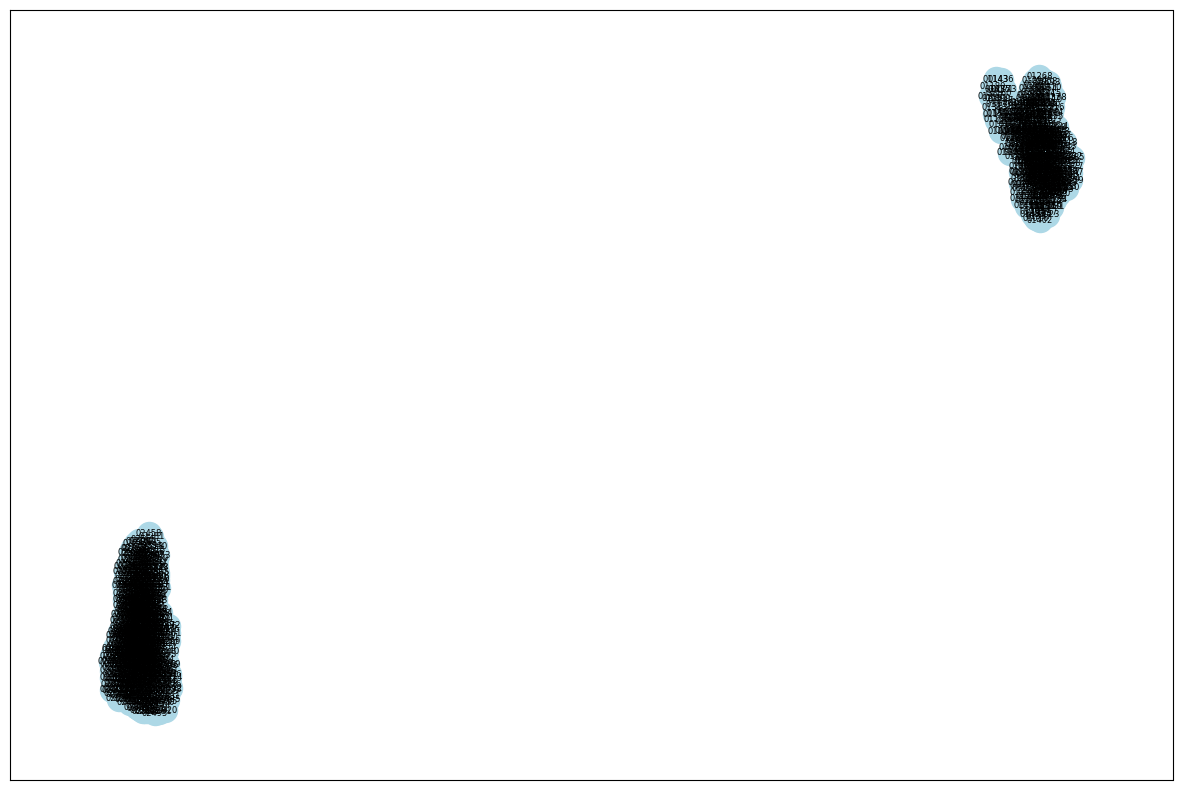

In [65]:
#Visualizing

plt.figure(figsize=(15,10))

pos = nx.spring_layout(g, seed=20, scale=1)

nx.draw_networkx_nodes(g, pos, node_color='lightblue', node_size=300)
nx.draw_networkx_edges(g, pos, edge_color='gray', width=1, alpha=0.7)
nx.draw_networkx_labels(g, pos, font_size=6)


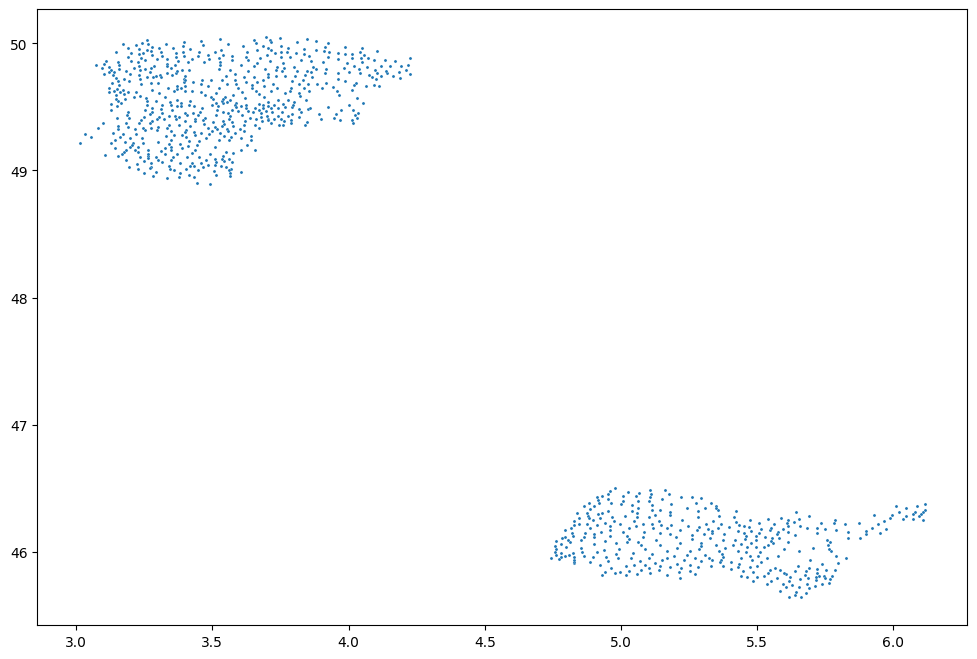

In [57]:
x= list(nx.get_node_attributes(g,"lon").values())
y= list(nx.get_node_attributes(g,"lat").values())

plt.figure(figsize=(12,8))
plot = sns.scatterplot(x=long_s,y=lat_s,s=5)


(array([ 16.,  16.,  78., 156., 172., 168., 115., 108., 100.,  71.]),
 array([ 62. , 106.4, 150.8, 195.2, 239.6, 284. , 328.4, 372.8, 417.2,
        461.6, 506. ]),
 <BarContainer object of 10 artists>)

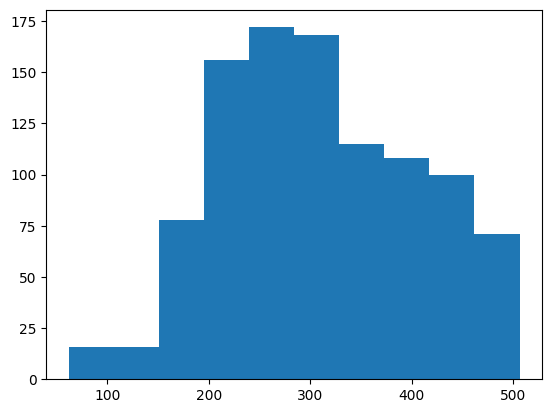

In [66]:
# Expected degree graph
degree= g.degree
lst= list(degree)
degree_arr= np.zeros(len(lst))

for i in range(len(lst)):
    degree_arr[i] = lst[i][1]
plt.hist(degree_arr)

I. B/ Graphe spatial et population 


Création d'un graph spatial suivant une loi gravitaire avec multiplication par population
pij propto (Pi * Pj)/Dij**2


In [135]:
# on commence avec l'ain 
N = 393
lat_s = lat[:N]
long_s = long[:N]
pop_s = popul[:N]
insee_s = insee[:N]

D = np.array([[haversine_vec(lat_s[i],long_s[i],lat_s[j],long_s[j]) for j in range(N)] for i in range(N)])*1e-3 #en km
mat = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if i==j:
            mat[i][j]=0
        else: 
            mat[i][j] = pop_s[i]*pop_s[j]/(D[i][j])**2
            #mat[i][j] = 1/D[i][j]**2
            

In [156]:
"""h = nx.Graph()
nodes = list(insee_s)



edges=[]
for i in range(N):
    
    for j in range(i+1,N):
        if mat[i][j]>1e-6:
            edges.append((insee[i],insee[j]))"""

In [145]:
h = nx.Graph()
nodes = list(insee_s)



A_rand = np.random.uniform(0,1,(N,N))
edges=[]
for i in range(N):
    
    for j in range(i+1,N):
        if mat[i][j]/10>A_rand[i][j]:
            edges.append((insee[i],insee[j]))

In [157]:
nodes = np.array(insee_s)
for i in range(N):
    h.add_node(nodes[i],latitude=lat[i],
        longitude=long[i])

h.add_edges_from(edges)


{'01001': Text(-0.1489075262999849, 0.2906808782104996, '01001'),
 '01002': Text(-0.030939436105841, -0.1402518729939189, '01002'),
 '01004': Text(-0.12108643474516463, -0.16917007257420552, '01004'),
 '01005': Text(-0.25437042443878866, 0.05023834114257713, '01005'),
 '01006': Text(-0.3308298333517328, -0.37891442650610657, '01006'),
 '01007': Text(-0.05912206671876137, -0.11895036661733324, '01007'),
 '01008': Text(-0.16453686936816997, -0.17103840246854352, '01008'),
 '01009': Text(-0.2840991807295466, -0.37210043733816317, '01009'),
 '01010': Text(-0.12639958958108263, -0.3645433166353182, '01010'),
 '01011': Text(0.3426330295833788, -0.13984842342665255, '01011'),
 '01012': Text(-0.007266797634681289, -0.18847898902407234, '01012'),
 '01013': Text(-0.17891317046159702, -0.26895880461582605, '01013'),
 '01014': Text(0.44440221138828484, -0.12827387653125544, '01014'),
 '01015': Text(-0.3339145149597432, -0.43085327044331834, '01015'),
 '01016': Text(0.03320668341109348, 0.754751829

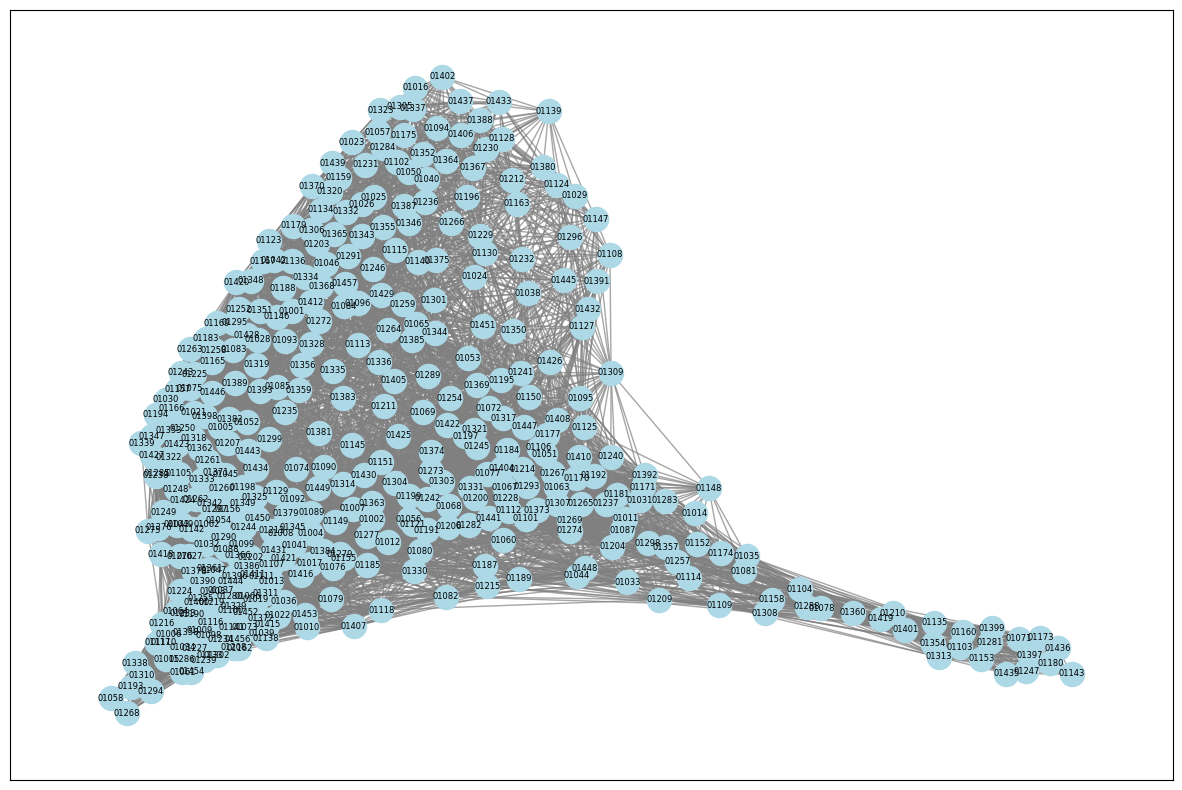

In [158]:
#Visualizing

plt.figure(figsize=(15,10))

pos = nx.spring_layout(h, seed=20, scale=1)

nx.draw_networkx_nodes(h, pos, node_color='lightblue', node_size=300)
nx.draw_networkx_edges(h, pos, edge_color='gray', width=1, alpha=0.7)
nx.draw_networkx_labels(h, pos, font_size=6)

In [161]:
nx.write_graphml(h, "grav_nopop_1e6.graphml")

II/ Création d'un nouveau graphe avec similarité cosinus \\

A. Catégorie : revenue, population, diplome
NB: sur communes_filtered

In [11]:
#Defition similarite cosinus
def cos_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    if norm_vec1 == 0 or norm_vec2 == 0:
        return 0.0
    return dot_product / (norm_vec1 * norm_vec2)

In [45]:
G = nx.Graph()
nodes = list(communes_filtered["insee"])
for i, node in enumerate(nodes):
    G.add_node(node, latitude=latitudes_filtered[i], longitude=longitudes_filtered[i], population=population_filtered[i],vote_gauche=vote_gauche_filtered[i])

pop_moy=np.mean(population_filtered)
rev_moy_moy = np.mean(revenu_moyen_filtered)
dip_moy= np.mean(diplome_filtered)
for i in range(len(nodes)):
    for j in range(i+1,len(nodes)):
        vec1 = [population_filtered[i]/pop_moy,revenu_moyen_filtered[i]/rev_moy_moy,diplome_filtered[i]/dip_moy]
        vec2 = [population_filtered[j]/pop_moy,revenu_moyen_filtered[j]/rev_moy_moy,diplome_filtered[j]/dip_moy]
        if cos_similarity(vec1,vec2)>0.999:
            G.add_edge(nodes[i],nodes[j])


(array([186., 258., 295., 176., 169., 135.,  86.,  75.,  54.,  27.]),
 array([ 0. ,  9.2, 18.4, 27.6, 36.8, 46. , 55.2, 64.4, 73.6, 82.8, 92. ]),
 <BarContainer object of 10 artists>)

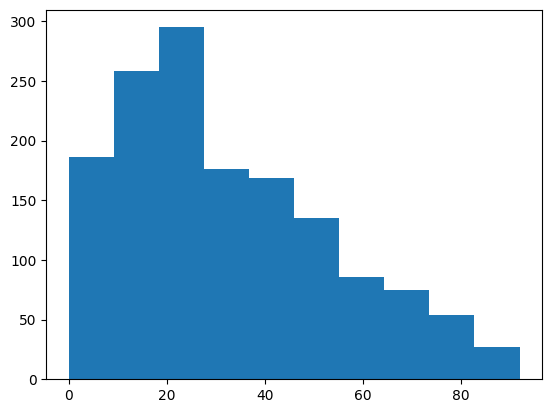

In [25]:
# histogram of degree values
degree=G.degree
lst= list(degree)
degree_arr= np.zeros(len(lst))

for i in range(len(lst)):
    degree_arr[i] = lst[i][1]
plt.hist(degree_arr)

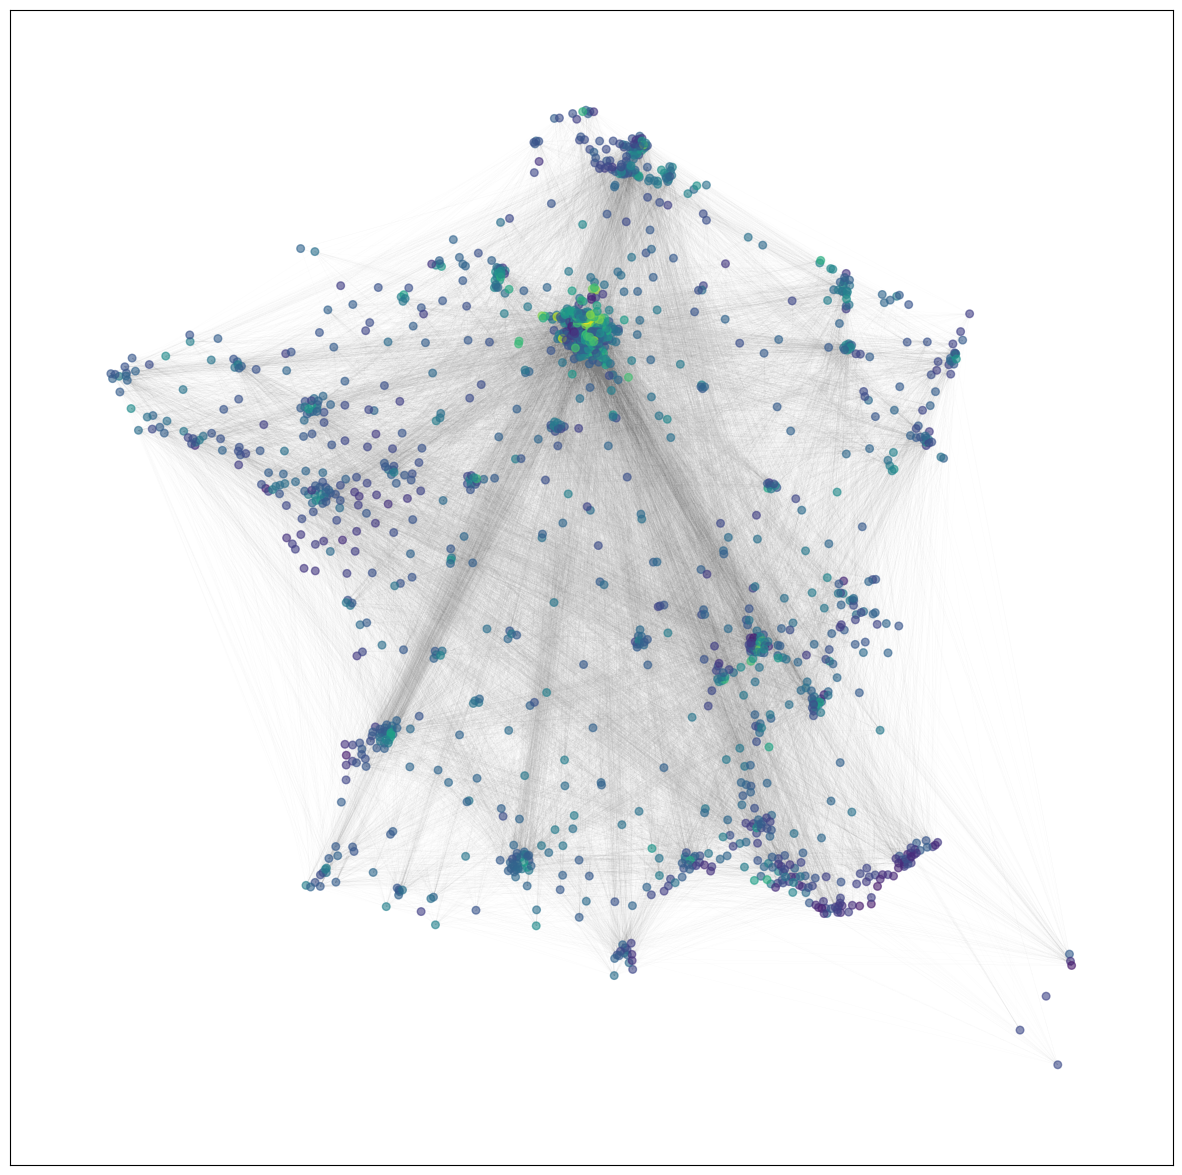

In [54]:


# visualisation
plt.figure(figsize=(15,15))
#pos = nx.spring_layout(G, seed=20, scale=1)
pos = {node: (G.nodes[node]['longitude'], G.nodes[node]['latitude']) for node in G.nodes}

nx.draw_networkx_nodes(G, pos, node_color=vote_gauche_filtered,cmap=plt.cm.viridis,node_size=30,node_shape='o', alpha=0.6)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.01, alpha=0.7)
#nx.draw_networkx_labels(G, pos, font_size=6)
plt.show()

In [111]:
# enregistrement 
nx.write_graphml(G, "cos_sim_test1.graphml")

Clustering coefficient: 


Average clustering coefficient: 0.6041690532761924


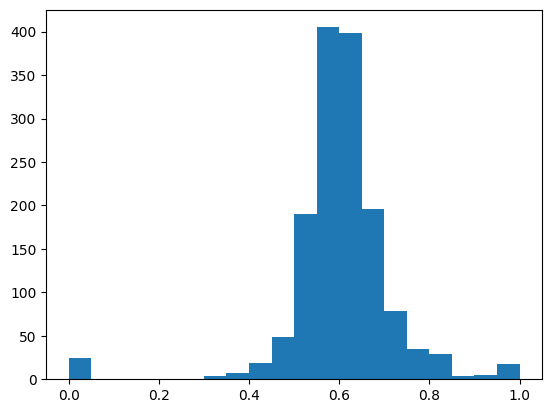

In [36]:
local_cc = nx.clustering(G)
cc_values = list(local_cc.values())
plt.hist(cc_values, bins=20)
print("Average clustering coefficient:", np.mean(cc_values))
node_colors_clus = [local_cc[n] for n in G.nodes]

Centralite eigenvectors

eigen: 0.011197604495384289


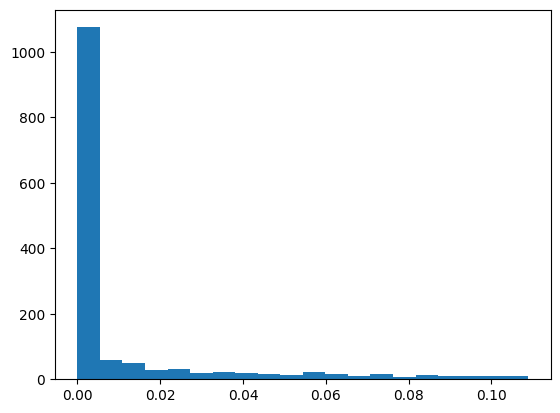

In [42]:
eigen_centrality = nx.eigenvector_centrality(G)
eigen_values = list(eigen_centrality.values())
plt.hist(eigen_values, bins=20)
print("eigen:", np.mean(eigen_values))
node_colors_eigen = [eigen_centrality[n] for n in G.nodes]